# Automobile Price Prediction  

## Objectives

-   Loading and Preprocessing the data 
-   Explore features or charecteristics to predict price of car
-   Develop prediction models
-   Evaluate and refine prediction models


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

The dataset can be downloaded from **[here](https://www.kaggle.com/datasets/premptk/automobile-data-changed)** 

In [2]:
#  read the data 
df = pd.read_csv('Automobile_data.csv')

In [3]:
np.shape(df)

(205, 26)

In [4]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### We can see that some columns need type casting from String (Object) to numerical values

<ul>
    <li>(normalized-losses, horsepower, peak-rpm, price) --> int64 </li>
    <li>(bore, stroke)  --> float64 </li>
</ul>


## Data Wrangling

### Identify and handle missing values

Convert "?" to NaN
In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience.

we can drop missing values along the column "price" since it's our target column 

In [6]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Now we can do our type cast

In [7]:
df[["normalized-losses", "horsepower", "peak-rpm", "price"]] = df[["normalized-losses", "horsepower", "peak-rpm", "price"]].astype("Int64")
df[['bore', 'stroke']] = df[['bore', 'stroke']].astype('float')

#### Count missing values in each column

In [8]:
missing_data = df.isnull().sum().sort_values(ascending=False) # count the number of NaN values in each column
missing_data = missing_data[missing_data > 0] # filter out columns with no NaN values
print('number of columns that has missing values: ',len(missing_data))
missing_data = missing_data.to_frame()
missing_data = missing_data.rename(columns = {0 : 'count'})
missing_data["type"] = df[missing_data.index].dtypes
missing_data

number of columns that has missing values:  7


,count,type
normalized-losses,41,Int64
price,4,Int64
stroke,4,float64
bore,4,float64
peak-rpm,2,Int64
num-of-doors,2,object
horsepower,2,Int64


#### Deal with missing data

<b>Replace by mean for numerical values:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency (mode) for catergorical values:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with mode. </li>
</ul>

> "price": 4 missing data, simply delete the whole row since that is our target column 

Start with dropping the rows from our target column (price)

In [9]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)
# reset index
df.reset_index(drop=True, inplace=True)
missing_data.drop('price', axis=0, inplace=True)
df.shape # we can see that 4 rows with NaN values in "price" column are dropped

(201, 26)

In [10]:
for col in missing_data.index:
    
    if missing_data.loc[col, 'type'] == 'object':
        df[col].fillna(df[col].mode()[0] , inplace=True)
    elif 'int' in str(missing_data.loc[col, 'type']).lower():
        df[col].fillna(np.around(df[col].mean()), inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)


missing_data = df.isnull().sum().sort_values(ascending=False) # count the number of NaN values in each column
missing_data = missing_data[missing_data > 0] # filter out columns with no NaN values
print('number of columns that has missing values: ',len(missing_data))


number of columns that has missing values:  0


<b>Good!</b> Now, we obtain the dataset with no missing values and all data in its proper format.


### Data Standardization
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km?</p>


<p>The formula for unit conversion is<p>
L/100km = 235 / mpg
<p>We can do many mathematical operations directly in Pandas.</p>


In [11]:
df_original = df.copy()
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df["city-mpg"] = 235/df["city-mpg"]
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={'city-mpg':'city-L/100km', 'highway-mpg':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,8.703704,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,8.703704,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,9.038462,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,7.833333,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,10.681818,17450


### Binning

<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

> We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins


Lets plot the histogram of horspower, to see what the distribution of horsepower looks like.


Text(0.5, 1.0, 'horsepower bins')

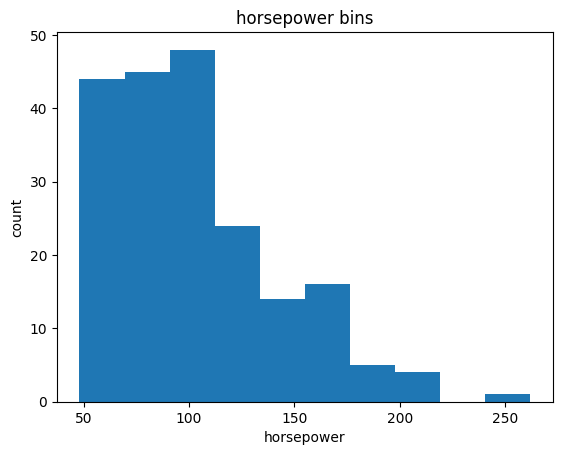

In [12]:
plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

 We apply the function "cut" the split the data into 3 ranges. 


In [13]:
df['horsepower-binned'] = pd.cut(df['horsepower'], 3, labels=['Low', 'Medium', 'High'], include_lowest=True )
df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Lets plot the distribution of each bin.


horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64


Text(0.5, 1.0, 'horsepower bins')

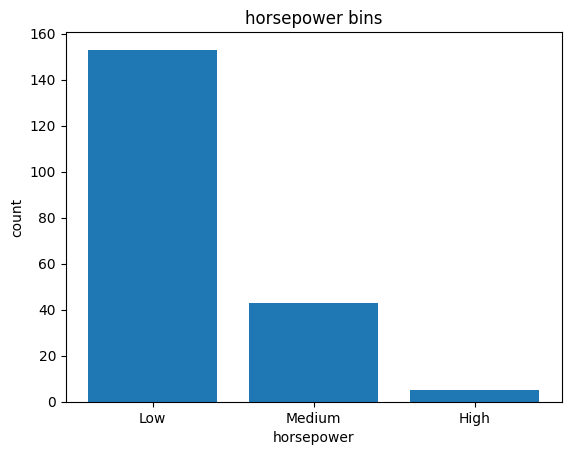

In [14]:
print(df["horsepower-binned"].value_counts())

plt.bar(df["horsepower-binned"].unique() ,df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<p>
    Check the dataframe above carefully, you will find the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High"). 
</p>

   > We successfully narrow the intervals from 57 to 3!



## Feature Selection

### Analyzing Individual Feature Patterns using Visualization


<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [15]:
# list the data types for each column
print(df.dtypes)

symboling               int64
normalized-losses       Int64
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              Int64
peak-rpm                Int64
city-L/100km          float64
highway-L/100km       float64
price                   Int64
horsepower-binned    category
dtype: object


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [16]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data = numeric_data.astype('float')
numeric_data.head() # we are missing number of doors and number of cylinders as they are object type

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0


In [17]:
numeric_data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279720,0.066171,-0.029807,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.238567,0.181189,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360236,0.476153,0.577576,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286032,0.657373,0.707108,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.614972,-0.245849,0.673363,0.736728,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086901,-0.309917,0.003811,0.084301,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279350,0.785353,0.836921,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256752,0.745059,0.783465,0.872335
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267334,0.554726,0.559197,0.543154
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063702,0.036285,0.047199,0.082267


#### Continuous numerical variables:

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>


Let's find the scatterplot of "engine-size" and "price" 


             engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000


<Axes: xlabel='engine-size', ylabel='price'>

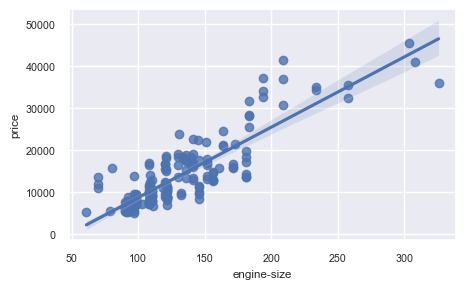

In [18]:
sns.set_theme(font_scale=0.7, rc={"figure.figsize": (5, 3)})
# Engine size as potential predictor variable of price
print(numeric_data[["engine-size", "price"]].corr())
sns.regplot(x="engine-size", y="price", data=numeric_data)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>

> High correlation value 0.872335


Highway-L/100km is a potential predictor variable of price 


                 highway-L/100km     price
highway-L/100km         1.000000  0.801118
price                   0.801118  1.000000


<Axes: xlabel='highway-L/100km', ylabel='price'>

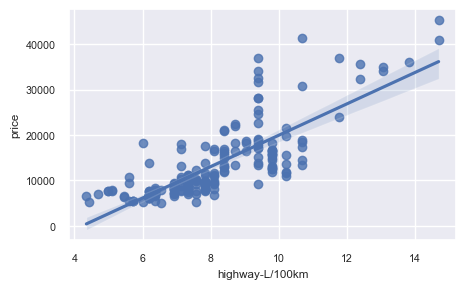

In [19]:
print(df[["highway-L/100km", 'price']].corr())
sns.regplot(x="highway-L/100km", y="price", data=numeric_data)

<p>As the "highway-L/100km" goes up, the price goes up: this indicates an positive relationship between these two variables. Highway-L/100km could potentially be a predictor of price.</p>

> High correlation value 0.801118

          peak-rpm     price
peak-rpm  1.000000 -0.101546
price    -0.101546  1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

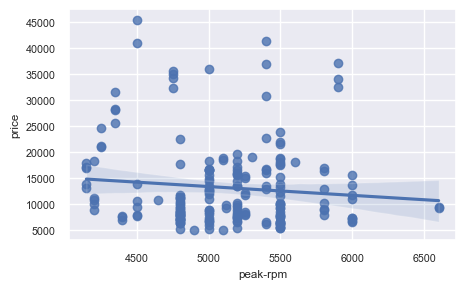

In [20]:
print(df[["peak-rpm", 'price']].corr())
sns.regplot(x="peak-rpm", y="price", data=numeric_data)

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.</p>

> Low correlation value -0.101546

We can examine the rest of the numerical data but to make it quick we will choose all the features with correlation greater than 0.65

In [21]:
numeric_data.corr()['price'].abs().sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809729
highway-L/100km      0.801118
city-L/100km         0.789898
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543154
height               0.135486
normalized-losses    0.133999
peak-rpm             0.101546
symboling            0.082391
stroke               0.082267
compression-ratio    0.071107
Name: price, dtype: float64

In [22]:
numerical_features = numeric_data.corr()['price'].abs() > 0.65
numerical_features = numerical_features[numerical_features].index
numerical_features = numerical_features.drop('price')
numerical_features

Index(['length', 'width', 'curb-weight', 'engine-size', 'horsepower',
       'city-L/100km', 'highway-L/100km'],
      dtype='object')

#### Categorical variables

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


In [23]:
def view_boxplot(df, col):
    print(df[col].value_counts())
    sns.boxplot(x=col, y='price', data=df)

body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


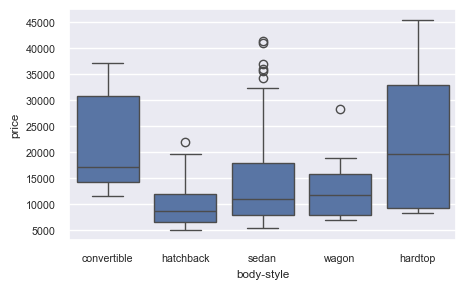

In [24]:
view_boxplot(df, "body-style")

<p>We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price.


engine-location
front    198
rear       3
Name: count, dtype: int64


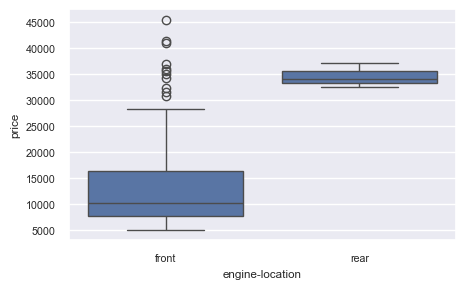

In [25]:
view_boxplot(df, "engine-location")

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price but we only have 3 rear values which makes the data very skewed and thus not a good feature to consider.</p>


drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64


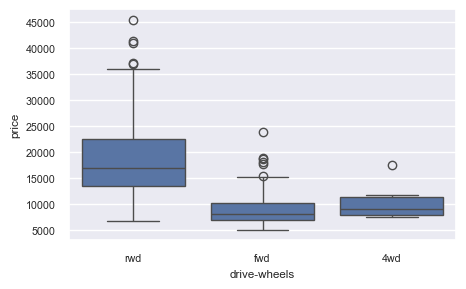

In [26]:
view_boxplot(df, "drive-wheels")

<p>Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.</p>


num-of-cylinders
four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: count, dtype: int64


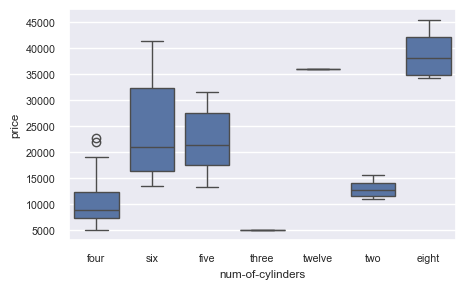

In [27]:
view_boxplot(df, 'num-of-cylinders')

<p>Here we see that the distribution of price between the different numbers of cylinders differs; as such num-of-cylinders could potentially be a predictor of price but most of the vehicles are four cylinders so we should be careful when using this feature.</p>


fuel-type
gas       181
diesel     20
Name: count, dtype: int64


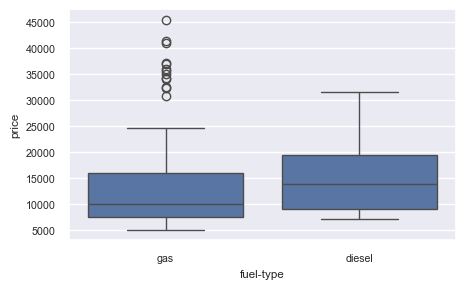

In [28]:
view_boxplot(df, 'fuel-type')

<p>Here we see that the distribution of price between the different types of fuel differs; have some overlap, and so fuel-type would not be a good predictor of price and also the data is skewed.</p>


aspiration
std      165
turbo     36
Name: count, dtype: int64


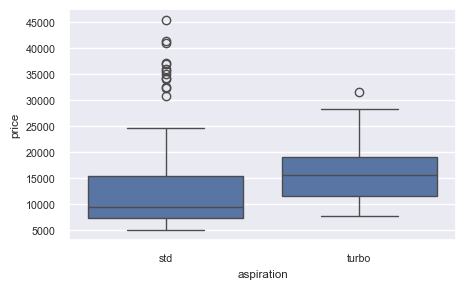

In [29]:
view_boxplot(df, 'aspiration')

<p>Here we see that the distribution of price between the different types aspiration differs; have some overlap but the average turbo is more expensive, and so aspiration may be a good predictor of price.</p>


num-of-doors
four    115
two      86
Name: count, dtype: int64


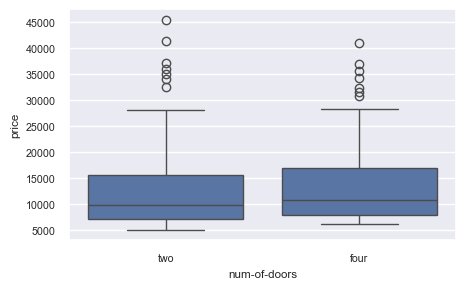

In [30]:
view_boxplot(df, 'num-of-doors')

<p>Here we see that the distribution of price between the different numbers of doors; have significant overlap, and so num-of-doors would not be a good predictor of price.</p>

engine-type
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: count, dtype: int64


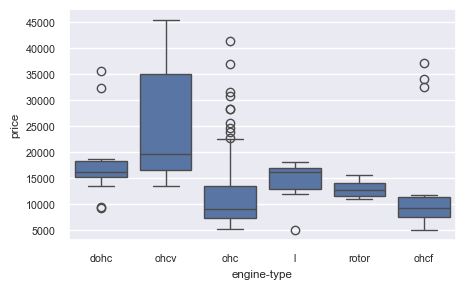

In [31]:
view_boxplot(df, 'engine-type')

<p>Here we see that the distribution of price between the different types of engines differs; have little overlap, and so engine-type may be a good predictor of price.</p>

fuel-system
mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


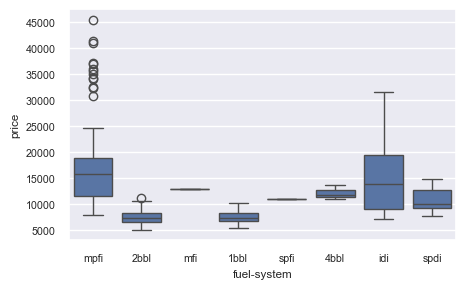

In [32]:
view_boxplot(df, 'fuel-system')

<p>Here we see that the distribution of price between the different types of fuel systems differs; have some overlap, and so engine-type may not be a good predictor of price.</p>

> only 2 types are considered 'cheap' and the rest are more expensive

In [33]:
categorical_features = ['drive-wheels', 'num-of-cylinders', 'aspiration', 'engine-type']


> We can see that our data has outliers but we are going to keep them for now 

### Descriptive Statistical Analysis


<p>Let's first take a look at the variables by utilizing a description method.</p>


In [34]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
count,201.000000,201.0,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.0,201.0,201.000000,201.000000,201.0
mean,0.840796,122.0,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.393035,5117.59204,9.944145,8.044957,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365623,478.11318,2.534599,1.840739,7947.066342
min,-2.000000,65.0,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.0,4150.0,4.795918,4.351852,5118.0
25%,0.000000,101.0,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.0,4800.0,7.833333,6.911765,7775.0
50%,1.000000,122.0,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.0,5118.0,9.791667,7.833333,10295.0
75%,2.000000,137.0,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.0,5500.0,12.368421,9.400000,16500.0
max,3.000000,256.0,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.0,6600.0,18.076923,14.687500,45400.0


In [35]:
df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


#### Value Counts


<p>Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".</p>


In [36]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

Let's convert the series to a Dataframe and save it "drive_wheels_counts" and rename the column  'drive-wheels' to 'value_counts'.

In [37]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


 Now let's rename the index to 'drive-wheels':


In [38]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable 'engine-location'.


In [39]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


<p>Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>


#### Grouping


<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

<p>We can select the columns 'drive-wheels' and 'price', then assign it to the variable "df_group_one".</p>


> We can then calculate the average price for each of the different categories of data.


In [40]:
df_group_one = df[['drive-wheels','price']]
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.0
1,fwd,9244.779661
2,rwd,19757.613333


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>You can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'. We can store the results in the variable 'df_group_two'.</p>


In [41]:
df_group_two = df[['drive-wheels','body-style','price']]
# grouping results
df_group_two = df_group_two.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_group_two

,drive-wheels,body-style,price
0,4wd,hatchback,7603.0
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.75
3,fwd,convertible,11595.0
4,fwd,hardtop,8249.0
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.8
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.6
9,rwd,hardtop,24202.714286


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:</p>


In [42]:
group_two_pivot = df_group_two.pivot(index='drive-wheels',columns='body-style')
group_two_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 <NA>          <NA>        7603.0  12647.333333   
fwd              11595.0        8249.0   8396.387755        9811.8   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd                9095.75  
fwd            9997.333333  
rwd           16994.222222

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well.</p>

In [43]:
group_two_pivot = group_two_pivot.fillna(0) #fill missing values with 0
group_two_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0           0.0        7603.0  12647.333333   
fwd              11595.0        8249.0   8396.387755        9811.8   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd                9095.75  
fwd            9997.333333  
rwd           16994.222222

<h4>Variables: Drive Wheels and Body Style vs Price</h4>


Let's use a heat map to visualize the relationship between Body Style vs Price.


<Axes: xlabel='body-style', ylabel='drive-wheels'>

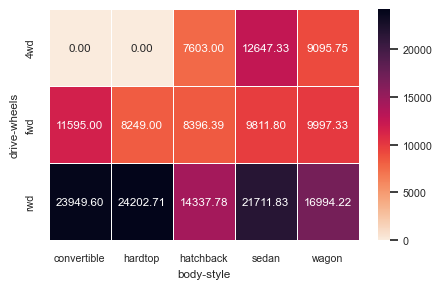

In [44]:
#use the grouped results
group_two_pivot = group_two_pivot.astype(float)
sns.heatmap(group_two_pivot['price'], annot=True, fmt='.2f', linewidths=0.5, cmap="rocket_r",)


<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

> As we can see, rear drive wheels have the highest price on average with different body styles.

### Correlation and Causation


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p3>Pearson Correlation</p>

<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr".  Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [45]:
df.corr(numeric_only=True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279720,0.066171,-0.029807,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.238567,0.181189,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360236,0.476153,0.577576,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286032,0.657373,0.707108,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.614972,-0.245849,0.673363,0.736728,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086901,-0.309917,0.003811,0.084301,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279350,0.785353,0.836921,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256752,0.745059,0.783465,0.872335
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267334,0.554726,0.559197,0.543154
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063702,0.036285,0.047199,0.082267


 sometimes we would like to know the significant of the correlation estimate. 


<b>P-value</b>: 

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


 We can obtain such information using  "stats" module in the "scipy"  library.


In [46]:
from scipy import stats

> Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 


In [47]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732947e-20


<p>Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't really strong (~0.585)</p>


> Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.


In [48]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8097290352560285  with a P-value of P =  5.92400102759337e-48


<p>Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809)</p>


> Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.


In [49]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466158917e-30


<p>Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

> Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':


In [50]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522676  with a P-value of P = 9.200335510480516e-38


Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

> Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':

In [51]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893972e-53


<p>Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>

> Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [52]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455181  with a P-value of P = 9.265491622201997e-64


<p>Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

> Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':


In [53]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431537659807734  with a P-value of P =   8.051208825441073e-17


<p>Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>

> Let's calculate the Pearson Correlation Coefficient and P-value of 'City-L/100km' and 'price':

In [54]:
pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.7898975136626943  with a P-value of P =  3.903106400939397e-44


<p>Since the p-value is < 0.001, the correlation between city-L/100km and price is statistically significant, and the coefficient of ~ 0.79 shows that the relationship is positive and moderately strong.</p>

In [55]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.8011176263981972  with a P-value of P =  3.0467845810417372e-46


Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ 0.801 shows that the relationship is positive and moderately strong.

### ANOVA: Analysis of Variance
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups, feature is Categorical and target is Numerical. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>Let's see if different types 'drive-wheels' impact  'price', we group the data.</p>


In [56]:
df_group_two = df[['drive-wheels','body-style','price']]
grouped_test2=df_group_two[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495
1,rwd,16500
3,fwd,13950
4,4wd,17450
5,fwd,15250
136,4wd,7603


we can use the function 'f_oneway' in the module 'stats'  to obtain the <b>F-test score</b> and <b>P-value</b>.


In [57]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577149576e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance.


In [58]:
df_group_tree = df[['num-of-cylinders','price']]
grouped_test3=df_group_tree[['num-of-cylinders', 'price']].groupby(['num-of-cylinders'])
grouped_test3.head(2)


,num-of-cylinders,price
0,four,13495
1,four,16500
2,six,16500
4,five,17450
5,five,15250
11,six,20970
17,three,5151
46,twelve,36000
52,two,10945
53,two,11845


In [59]:
# ANOVA
f_val, p_val = stats.f_oneway(*[group['price'] for _, group in grouped_test3])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  


ANOVA results: F= 54.94365304663237 , P = 2.8701445428125943e-39


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance.


In [60]:
df_group_four = df[['aspiration','price']]
grouped_test4=df_group_four[['aspiration', 'price']].groupby(['aspiration'])
grouped_test4.head(2)


,aspiration,price
0,std,13495
1,std,16500
8,turbo,23875
22,turbo,7957


In [61]:
# ANOVA
f_val, p_val = stats.f_oneway(*[group['price'] for _, group in grouped_test4])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  


ANOVA results: F= 6.631286341771227 , P = 0.01074585384180398


This is a bad result, with a small F test score we have to check the critical F but the P value is greater than 0.05 implying aspiration may not be a good feature.


In [62]:
categorical_features.remove('aspiration')

In [63]:
df_group_five = df[['engine-type','price']]
grouped_test5=df_group_five[['engine-type', 'price']].groupby(['engine-type'])
grouped_test5.head(2)


,engine-type,price
0,dohc,13495
1,dohc,16500
2,ohcv,16500
3,ohc,13950
4,ohc,17450
17,l,5151
46,ohcv,36000
52,rotor,10945
53,rotor,11845
104,l,11900


In [64]:
# ANOVA
f_val, p_val = stats.f_oneway(*[group['price'] for _, group in grouped_test5])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  


ANOVA results: F= 9.845110955850451 , P = 2.0865492749735427e-08


This is may be a good result, with a small F test score we have to check the critical F with the P value is almost 0 so we better check the critical F.

In [65]:
alpha = 0.05

# Degrees of freedom for groups and residuals
df_between = len(grouped_test5) - 1
df_within = len(df['price']) - len(grouped_test5)

# Calculate the critical F-value
critical_f_value = stats.f.ppf(1 - alpha, df_between, df_within)
print("Critical F-value:", critical_f_value)

Critical F-value: 2.260406213004508


Since our F value is greater than the critical F we reject the null hypothesis. so engine-type can be considered a good feature.

<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
    <li>num-of-cylinders</li>
    <li>engine-type</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


In [66]:
print(numerical_features)
print(categorical_features)

Index(['length', 'width', 'curb-weight', 'engine-size', 'horsepower',
       'city-L/100km', 'highway-L/100km'],
      dtype='object')
['drive-wheels', 'num-of-cylinders', 'engine-type']


but before we start model development, we need to convert categorical variables into numerical variables

In [67]:
# Use one-hot encoding
df_categorical = pd.get_dummies(df[categorical_features], drop_first=True, dtype='int64')
df_categorical.head()

,drive-wheels_fwd,drive-wheels_rwd,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,1,0
3,1,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0,0


In [68]:
df_numerical = df[numerical_features]
df_numerical.head()

,length,width,curb-weight,engine-size,horsepower,city-L/100km,highway-L/100km
0,168.8,64.1,2548,130,111,11.190476,8.703704
1,168.8,64.1,2548,130,111,11.190476,8.703704
2,171.2,65.5,2823,152,154,12.368421,9.038462
3,176.6,66.2,2337,109,102,9.791667,7.833333
4,176.6,66.4,2824,136,115,13.055556,10.681818


In [69]:
df_features = pd.concat([df_numerical, df_categorical], axis=1)
df_features.head()

,length,width,curb-weight,engine-size,horsepower,city-L/100km,highway-L/100km,drive-wheels_fwd,drive-wheels_rwd,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,168.8,64.1,2548,130,111,11.190476,8.703704,0,1,0,1,0,0,0,0,0,0,0,0,0
1,168.8,64.1,2548,130,111,11.190476,8.703704,0,1,0,1,0,0,0,0,0,0,0,0,0
2,171.2,65.5,2823,152,154,12.368421,9.038462,0,1,0,0,1,0,0,0,0,0,0,1,0
3,176.6,66.2,2337,109,102,9.791667,7.833333,1,0,0,1,0,0,0,0,0,1,0,0,0
4,176.6,66.4,2824,136,115,13.055556,10.681818,0,0,1,0,0,0,0,0,0,1,0,0,0


In [70]:
df_target = df['price']
df_target.head() 

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: Int64

## Model Development

Some questions we want to ask in this module

<ul>
    <li>do I know if the dealer is offering fair value for my trade-in?</li>
    <li>do I know if I put a fair value on my car?</li>
</ul>
<p>Data Analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>


**Linear Regression**


<p>One example of a Data  Model that we will be using is</p>
<b>Simple Linear Regression</b>.

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$


 <b>Linear function:</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


> We can scale that and use Multiple Linear Regression to predict the price of a car since we know that we have multiple features that are correlated with the price of a car.

### Multiple Linear Regression


<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>


$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$


$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$


The equation is given by


$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


Lets load the modules we will need


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error , r2_score


#### Multi-linear Regression Model


In [72]:
lm = LinearRegression()
lm

LinearRegression()

First lets split the data into train and test datasets 80%-20% respectively


In [73]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)


Fit the linear model using our features.


In [74]:
lm.fit(X_train,y_train)

LinearRegression()

What is the value of the intercept (a)?


In [75]:
lm.intercept_

-16997.520002905658

What is the value of the Slope (b1,b2,b3,..)?


In [76]:
lm.coef_

array([-5.62051554e+01,  6.75542163e+02,  4.61352599e+00,  1.00551658e+01,
        1.67489618e+01,  1.24046126e+03, -1.28499694e+03,  7.09202884e+02,
        2.98856282e+03, -2.20719322e+04, -2.55236583e+04, -2.01269496e+04,
       -2.03295333e+04, -1.18840677e+04, -1.30660578e+04,  1.77285114e+02,
        1.81028677e+03,  2.63044319e+03, -5.57589298e+03, -1.30660578e+04])

#### Polynomial Regression


<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>


<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


<p>We will use the following function to plot the data:</p>


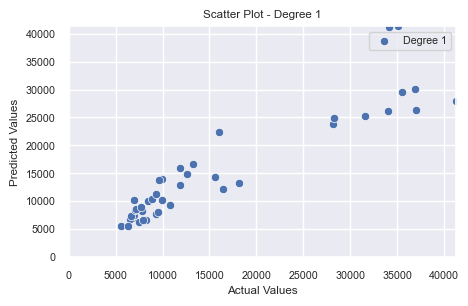

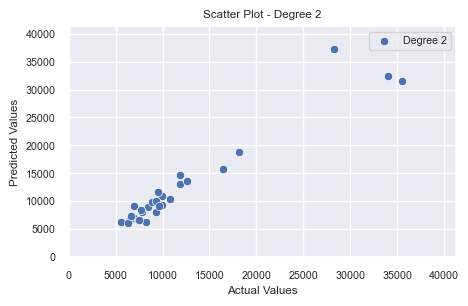

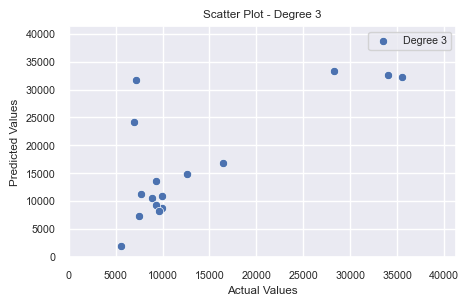

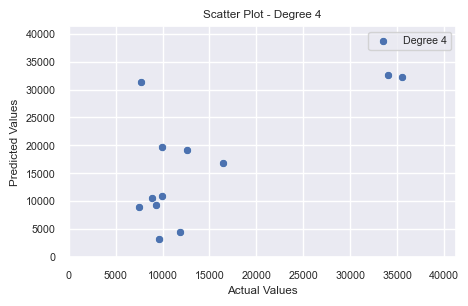

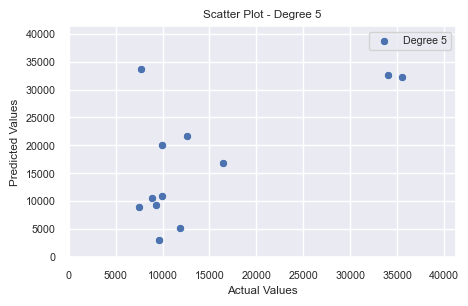

In [77]:
degrees = [1, 2, 3, 4, 5]  # Test different polynomial degrees

# Set up subplots
for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Make predictions on the test set
    X_poly_test = poly_features.transform(X_test)
    y_pred = model.predict(X_poly_test)

    # Create a scatter plot using Seaborn
    sns.scatterplot(x=y_test, y=y_pred, label=f'Degree {degree}')

    # Set labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot - Degree {degree}')
    plt.legend()
    plt.xlim(0, np.max(y_test))
    plt.ylim(0, np.max(y_test))
    plt.show()

> In the scatter plot, we're looking for a pattern where the points are close to a diagonal line. Deviations from the line may indicate that the model is either underfitting or overfitting. which makes the second degree model is quite acceptable

Lets train a ploynomial second degree linear regression

In [78]:
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)

# Fit a linear regression model
lm_poly2 = LinearRegression()
lm_poly2.fit(X_poly_train, y_train)

# # Make predictions on the test set
# X_poly_test = poly_features.transform(X_test)
# y_pred_poly = lm_poly2.predict(X_poly_test)

LinearRegression()

#### Model Evaluation using Visualization


Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.


<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


In [79]:
#First lets create a function to display Actual vs Fitted Values for Price distributions
def distribution_plot(y_values, y_pred):
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(5, 3))

    # Plot the actual values
    sns.histplot(y_values, color="r", label="Actual Value",kde=True, ax=ax, bins=20)

    # Plot the fitted values (predicted values)
    sns.histplot(y_pred, color="b", label="Fitted Values", kde=True, ax=ax, bins=20)

    # Set labels and title
    plt.title('Actual vs Fitted Values for Price')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()

    # Show the plot
    plt.show()

##### then lets make a prediction using our first degree model


In [80]:
y_pred = lm.predict(X_train)

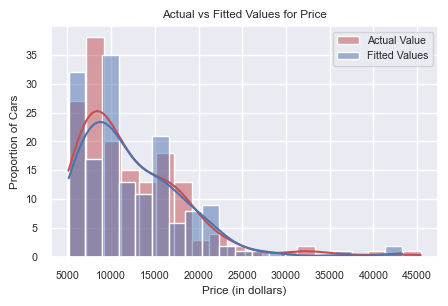

In [81]:
distribution_plot(y_train, y_pred)

> lets check the test data

In [82]:
y_pred = lm.predict(X_test)

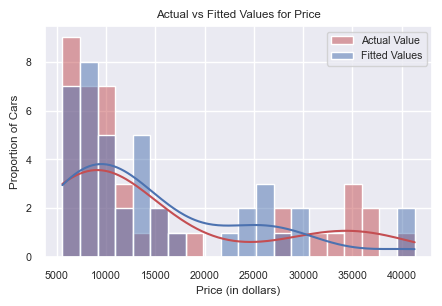

In [83]:
distribution_plot(y_test, y_pred)

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


##### Lets try the second degree model

In [84]:
y_pred = lm_poly2.predict(X_poly_train)

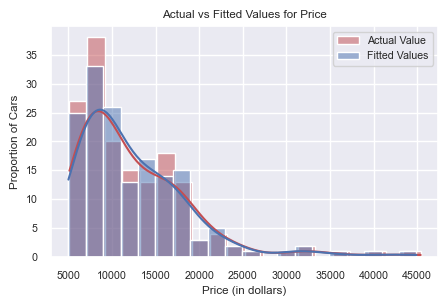

In [85]:
distribution_plot(y_train, y_pred)

> lets check the test data

In [86]:
X_poly_test = poly_features.transform(X_test)
y_pred = lm_poly2.predict(X_poly_test)

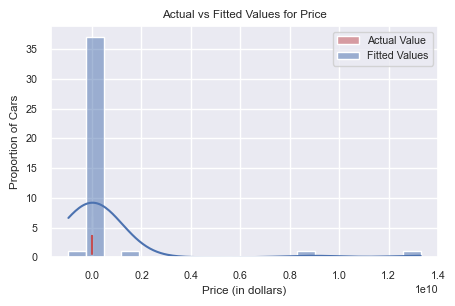

In [87]:
distribution_plot(y_test, y_pred)

> The second degree model is training better than first degree but it performs really bad with the test data

#### Measures for In-Sample Evaluation


<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Root Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Root Mean Squared Error (MSE)</b>

<p>The Root Mean Squared Error measures the square root of the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>


##### Model 1: Multiple Linear Regression


Let's calculate the R^2 and RMSE


In [88]:
# Make predictions on the test set
y_pred = lm.predict(X_test)

# Evaluate using R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R-squared: {r2}')
print(f'RMSE: {rmse}')

R-squared: 0.8428195070307294
RMSE: 4385.262375997191


We can say that ~ 84.282 % of the variation of price is explained by this multiple linear regression "multi_fit".

And on average we have an error of ± 4385.26 dollars for the predicted prices

##### Model 2: Polynomial Fit second degree


Let's calculate the R^2 and RMSE


In [89]:
# Make predictions on the test set
X_poly_test = poly_features.transform(X_test)
y_pred = lm_poly2.predict(X_poly_test)


# Evaluate using R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R-squared: {r2}')
print(f'RMSE: {rmse}')

R-squared: -51849965938.731026
RMSE: 2518665523.0842814


R2 compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2 is negative. 
> Note that R2 is not always the square of anything, so it can have a negative value without violating any rules of math. R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.
<p>Second degree model is performing really bad on test set. It is overfitting the training set. We can try to use regularization to reduce overfitting or make it more simpler by using less features.<p>

#### **Tuning** second degree Polynomial Model
<ul>
    <li>Scaling the data</li>
    <li>Applying Regularization</li>
    <ul>
    <li>Ridge Regularization</li>
    <li>Lasso Regularization</li>
</ul>
</ul>

<i>**Scaling the Data**</i>

In machine learning, it is often important to scale or normalize the features in your dataset. Scaling ensures that all features have a similar scale, which can be crucial for the proper functioning of many machine learning algorithms. Here, we'll discuss the concept of scaling and introduce the idea of standard scaling.

<b> Why Scale the Data?</b>

1. **Algorithm Sensitivity:** Some machine learning algorithms are sensitive to the scale of the input features. For example, distance-based algorithms like k-nearest neighbors can be heavily influenced by the scale of the features.

2. **Convergence of Optimization Algorithms:** Optimization algorithms used in training models, such as gradient descent, may converge faster when features are on a similar scale such in our case.

3. **Equal Importance of Features:** Scaling ensures that all features contribute equally to the model training process, preventing any single feature from dominating due to its larger scale.

**Standard Scaling**

One common scaling technique is **standard scaling** (also known as z-score normalization). Standard scaling transforms the data such that it has a mean of 0 and a standard deviation of 1. This is achieved by subtracting the mean and dividing by the standard deviation for each feature.

The formula for standard scaling is:

$ \text{Standardized Value} = \frac{\text{Original Value} - \text{Mean}}{\text{Standard Deviation}} $


<i> **Ridge and Lasso Regularization** </i>

Regularization is a technique used in machine learning to prevent overfitting by adding a penalty term to the loss function. Two common forms of regularization are Ridge and Lasso.
<ul>
<li> <b>Ridge Regression</b>

also known as L2 regularization, adds a penalty term proportional to the square of the magnitude of the coefficients. This helps prevent overly large coefficients, smoothing the model and reducing its sensitivity to individual data points.

The Ridge regression objective function is:

$ \text{Objective} = \text{Loss} + \alpha \sum_{i=1}^{n} \beta_i^2  $

Here,  $\alpha$ is the regularization strength. </li>

<li> <b>Lasso Regression</b>

Lasso regression, or L1 regularization, adds a penalty term proportional to the absolute value of the coefficients. This has a sparsity-inducing effect, often leading to some coefficients being exactly zero.

The Lasso regression objective function is:

$ \text{Objective} = \text{Loss} + \alpha \sum_{i=1}^{n} |\beta_i| $

Here,  $\alpha$  is the regularization strength. </li>
<ul>

> Cross-Validated Ridge and Lasso

>> Choosing the right regularization strength ( $\alpha$ ) is crucial for the effectiveness of Ridge and Lasso. Cross-validated versions of these algorithms, such as `RidgeCV` and `LassoCV` in scikit-learn, automatically perform cross-validation to find the best alpha value.


In [90]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_poly_train_scaled = scaler.fit_transform(X_poly_train)
X_poly_test_scaled = scaler.transform(X_poly_test)

# Set alpha values to test
alphas = np.logspace(-6, 6, 13)  # Example range, adjust as needed

# Create RidgeCV model with cross-validation
ridge_cv_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv_model.fit(X_poly_train_scaled, y_train)

# Get the best alpha value from cross-validation
best_alpha = ridge_cv_model.alpha_

# Make predictions on the test set
y_pred_ridge_cv = ridge_cv_model.predict(X_poly_test_scaled)

# Evaluate using R-squared and RMSE
r2_ridge_cv = r2_score(y_test, y_pred_ridge_cv)
rmse_ridge_cv = np.sqrt(mean_squared_error(y_test, y_pred_ridge_cv))

print(f'Best Alpha (Ridge): {best_alpha}')
print(f'R-squared (Ridge): {r2_ridge_cv}')
print(f'RMSE (Ridge): {rmse_ridge_cv}')


Best Alpha (Ridge): 1.0
R-squared (Ridge): 0.9452213116093721
RMSE (Ridge): 2588.821306752452


- We can say that ~ 94.522 % of the variation of price is explained by this ridge regularized polynomial model.
- On average we have an error of ± 2588.82 dollars for the predicted prices.

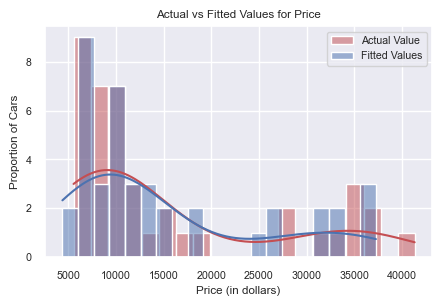

In [102]:
distribution_plot(y_test, y_pred_ridge_cv)

- The visualization of the results reveals a significant overlap in the distributions of predicted values and actual values, indicating that the models are achieving good results. 
> This overlap suggests that the predictions closely align with the true values, demonstrating the effectiveness of the chosen models. The visualization reinforces the robustness and accuracy of the models in capturing the underlying patterns in the data.

In [103]:
from sklearn.linear_model import LassoCV

scaler = StandardScaler()
X_poly_train_scaled = scaler.fit_transform(X_poly_train)
X_poly_test_scaled = scaler.transform(X_poly_test)
# Create LassoCV model with cross-validation
lasso_cv_model = LassoCV(alphas=alphas,tol=0.01,max_iter=10000)
lasso_cv_model.fit(X_poly_train_scaled, y_train)

# Get the best alpha value from cross-validation
best_alpha_lasso = lasso_cv_model.alpha_

# Make predictions on the test set
y_pred_lasso_cv = lasso_cv_model.predict(X_poly_test_scaled)

# Evaluate using R-squared and RMSE
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)
rmse_lasso_cv = np.sqrt(mean_squared_error(y_test, y_pred_lasso_cv))

print(f'Best Alpha (Lasso): {best_alpha_lasso}')
print(f'R-squared (Lasso): {r2_lasso_cv}')
print(f'RMSE (Lasso): {rmse_lasso_cv}')

Best Alpha (Lasso): 10.0
R-squared (Lasso): 0.9467392482391482
RMSE (Lasso): 2552.7007482073486


- We can say that ~ 94.674 % of the variation of price is explained by this lasso regularized polynomial model.
- And on average we have an error of ± 2552.7 dollars for the predicted prices.

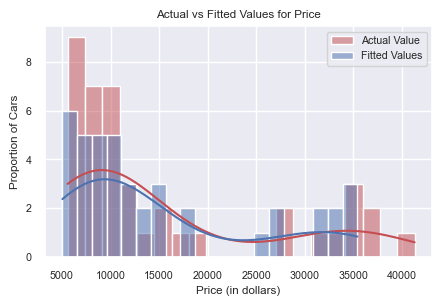

In [104]:
distribution_plot(y_test, y_pred_lasso_cv)

- The visualization of the results reveals a significant overlap in the distributions of predicted values and actual values, indicating that the models are achieving good results. 
> This overlap suggests that the predictions closely align with the true values, demonstrating the effectiveness of the chosen models. The visualization reinforces the robustness and accuracy of the models in capturing the underlying patterns in the data.

### Random Forest Regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate using R-squared and RMSE
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'R-squared (Random Forest): {r2_rf}')
print(f'RMSE (Random Forest): {rmse_rf}')

R-squared (Random Forest): 0.9357634095671995
RMSE (Random Forest): 2803.4156939860827


### Decision Making: Determining a Good Model Fit


<p>Now that we have visualized the different models, and generated the R-squared and RMSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>
<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good RMSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest RMSE value is a better fit</b> for the data.</p>

<b>Let's take a look at the values for the different models.</b>
    
<p>Multiple Linear Regression (First degree).
<ul>
    <li>R-squared: 0.8428195070307294</li>
    <li>RMSE: 4385.262375997191</li>
</ul>
</p>
    
<p>Polynomial Fit (Second degree).
<ul>
    <li>R-squared: -51849965938.731026</li>
    <li>RMSE: 2518665523.0842814</li>
</ul>

<p>Ridge Regularization Polynomial Fit (Second degree).
<ul>
    <li>R-squared: 0.9452213116093721</li>
    <li>RMSE: 2588.821306752452</li>
</ul>

<p>Lasso Regularization Polynomial Fit (Second degree).
<ul>
    <li>R-squared: 0.9467392482391482</li>
    <li>RMSE: 2552.7007482073486</li>
</ul>

</p>


<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should some evaluation metrics such as R^2 and RMSE.</p>

<p> We can see that The second-degree polynomial fit appears to have serious issues, as evidenced by the extremely negative R-squared and a very high RMSE. This indicates severe overfitting or other problems with the model, making it unreliable for prediction.</p>

#### Insights

- The polynomial model without regularization (second degree) performed poorly, likely suffering from overfitting. The extremely negative R-squared and very high RMSE indicate that the model did not generalize well to new data.

- Ridge and Lasso regularization proved to be effective strategies in mitigating overfitting in the second-degree polynomial model. Both regularization techniques resulted in improved R-squared values and lower RMSE compared to the unregularized model.

- Between Ridge and Lasso, both performed well, showcasing the power of regularization in enhancing model performance. However, Lasso slightly outperformed Ridge in terms of both R-squared and RMSE. The Lasso technique, which introduces sparsity in the coefficients, contributed to a more interpretable and competitive model.

> These findings underscore the importance of regularization in polynomial models, with Lasso regularization emerging as the preferred choice for achieving a balance between fitting the data well and generalizing to new observations.


## Conclusion:


<p>Considering the results, the <b>Lasso Regularization Polynomial Fit (Second Degree)</b> seems to be the preferred model. It strikes a good balance between fitting the data well (high R-squared) and generalizing to new data (low RMSE). The regularization techniques are effective in enhancing the model's performance.</p>
